In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image, ImageDraw
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
def set_seaborn_style(font_family, background_color, grid_color, text_color):
    sns.set_style({
        "axes.facecolor": background_color,
        "figure.facecolor": background_color,

        "axes.grid": True,
        "axes.axisbelow": True,

        "grid.color": grid_color,

        "text.color": text_color,
        "font.family": font_family,

        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,

        "axes.spines.left": False,
        "axes.spines.bottom": False,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
)

In [3]:
font_family = "PT Mono"
background_color = "#FFFFFF"
text_color = "#080520"
grid_color = "#FFFFFF"

set_seaborn_style(font_family, background_color, grid_color, text_color)

In [4]:
def create_rankings(df, columns):
    rank_columns = ["rank_{}".format(i) for i in range(len(columns))]
    for i, column in enumerate(columns):
        df[rank_columns[i]] = df[column].rank(method='min', ascending=False)
#         print(df[rank_columns[i]])
        df[rank_columns[i]] = np.floor(df[rank_columns[i]])
        
    return df, rank_columns

In [5]:
def format_ticks(ax, years, padx=0.25, pady=0.25, y_label_size=20, x_label_size=20):
    ax.set(xlim=(-padx, len(years) -1 + padx), ylim=(-len(df) - pady, - pady))
    
    xticks = [i for i in range(len(years))]
    ax.set_xticks(ticks=xticks, labels=years)

    yticks = [-i for i in range(1, len(df) + 1)]
    ylabels = ["{}".format(i) for i in range(1, len(df) + 1)]
    ax.set_yticks(ticks=yticks, labels=ylabels)
    ax.tick_params("y",labelsize=y_label_size, pad=16)
    ax.tick_params("x", labeltop=True, labelsize=x_label_size, pad=8)

In [6]:
def add_line(ax, row, columns):
    x = [i for i in range(len(columns))]
    y = [-row[rc] for rc in columns]
    
    ax.add_artist(
        Line2D(x, y, linewidth=1., color="#DADBDD")
    )

In [7]:
def add_pie_and_flag(ax, x, y, name, ratio, size=374, zoom=0.1):
    flag = Image.open("256/{}.png".format(name.lower()))
    image = Image.new('RGBA', (size, size))
    
    draw = ImageDraw.Draw(image)
    pad = int((size - 256) / 2)
    
    draw.pieslice((0, 0, size, size), start=-90, end=360*ratio-90, fill="#808080", outline="#504A4B")
    image.paste(flag, (pad, pad), flag.split()[-1])
    
    im = OffsetImage(image, zoom=zoom, interpolation="lanczos", resample=True, visible=True)

    ax.add_artist(AnnotationBbox(
        im, (x, y), frameon=False,
        xycoords="data",
    ))

In [8]:
def add_text(ax, value, max_value, y):
    trillions = round(value / 1e12, 1)
    ratio_to_max = round(100 * value / max_value, 1)
    
    text = "{}\n${:,}T ({}%)".format(
        row.country_name, 
        trillions,
        ratio_to_max
    )
            
    ax.annotate(
        text, (1.03, y), 
        fontsize=10,
        linespacing=1.7,
        va="center",
        xycoords=("axes fraction", "data")
    )

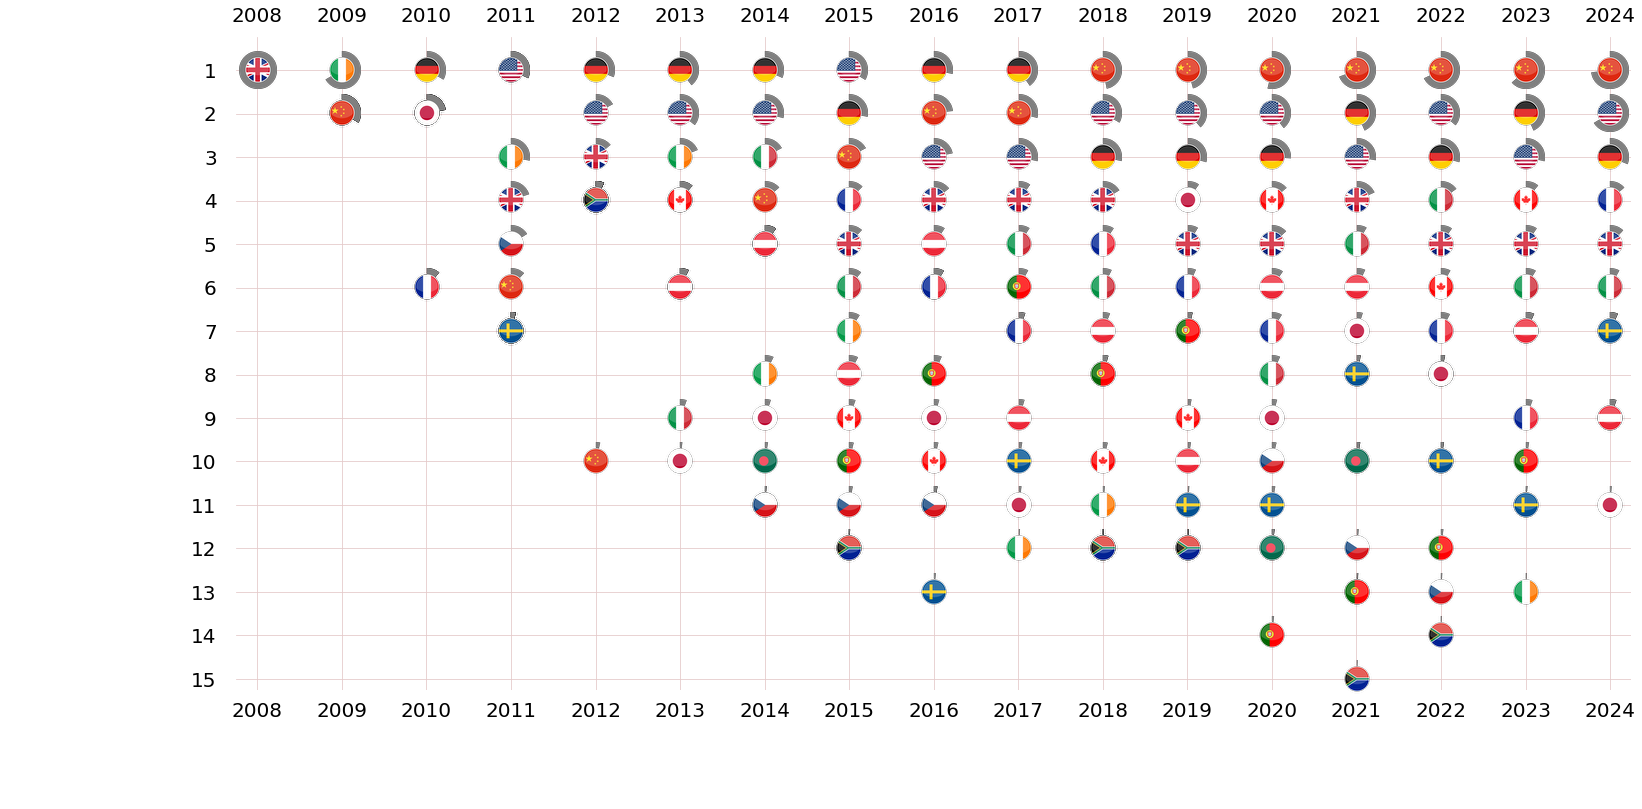

In [14]:
background_color = "#FFFFFF"
text_color = "#080520"
grid_color = "#E4C9C9"

set_seaborn_style(font_family, background_color, grid_color, text_color)

years = ["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024"]

df = pd.read_csv("country-ranking-15.csv", index_col=None)
df, rank_columns = create_rankings(df, years)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 0.8*len(df)))
format_ticks(ax, years)

for i, row in df.iterrows():
    
    for j, rc in enumerate(rank_columns):

        add_pie_and_flag(
            ax, j, -row[rc], 
            name=row.country_name,
            ratio=row[years[j]]
        )
        
plt.show()
# plt.savefig('country_rank.png', transparent=True, dpi=300)

In [256]:
df[["country_name"] + rank_columns]

,country_name,rank_0,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10,rank_11,rank_12,rank_13,rank_14,rank_15,rank_16
0,United Kingdom,1.0,NaN,2.0,4.0,3.0,6.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0
1,Ireland,NaN,1.0,2.0,3.0,4.0,3.0,8.0,7.0,11.0,12.0,11.0,12.0,12.0,13.0,8.0,13.0,NaN
2,Germany,NaN,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0
3,USA,NaN,2.0,NaN,1.0,2.0,2.0,2.0,1.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0
4,China,NaN,2.0,NaN,6.0,10.0,4.0,4.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,Italy,NaN,NaN,2.0,7.0,4.0,9.0,3.0,6.0,6.0,5.0,6.0,7.0,8.0,5.0,4.0,6.0,6.0
6,Japan,NaN,NaN,2.0,NaN,4.0,10.0,9.0,15.0,9.0,11.0,8.0,4.0,9.0,7.0,8.0,7.0,11.0
7,Canada,NaN,NaN,6.0,7.0,NaN,4.0,5.0,9.0,10.0,7.0,10.0,9.0,4.0,10.0,6.0,4.0,9.0
8,France,NaN,NaN,6.0,7.0,NaN,11.0,11.0,4.0,6.0,7.0,5.0,6.0,7.0,8.0,7.0,9.0,4.0
9,Czech Republic,NaN,NaN,NaN,5.0,NaN,6.0,11.0,11.0,11.0,13.0,12.0,12.0,10.0,12.0,13.0,11.0,NaN
